In [1]:
#https://www.pythonfordatascience.org/anova-python/
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
import pandas as pd
# %pip install researchpy
import researchpy as rp
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/kaggleFiles/data/titanic/train.csv')
# df = pd.read_csv('D:/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/RClasses/data/titanic/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


******** Fare per Survived ********
           Fare                                                          
          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


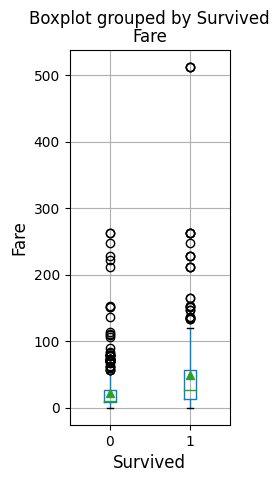

In [3]:
def qualiQuantiVariablesAnalysis (varName1, varName2):
    title = varName1 + " per " + varName2
    print("******** " + title + " ********")
    print(df[[varName1, varName2]].groupby(varName2).describe())
    boxVarS = df.boxplot(column=varName1,figsize=(2,5),vert=True, by=varName2, showmeans= True)
    boxVarS.set_ylabel(varName1,fontsize=12)
    boxVarS.set_xlabel(varName2,fontsize=12)
qualiQuantiVariablesAnalysis('Fare', 'Survived')

In [4]:
rp.summary_cont(df['Fare'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Fare,891.0,32.2042,49.6934,1.6648,28.9368,35.4716


In [5]:
rp.summary_cont(df['Fare'].groupby(df['Survived']))

,N,Mean,SD,SE,95% Conf.,Interval
Survived,,,,,,
0,549,22.1179,31.3882,1.3396,19.4865,24.7493
1,342,48.3954,66.5970,3.6012,41.3121,55.4787


In [6]:
#anova
#H0: the mean of the quantitative variable is the same, for any group from the qualitative variable
#H1: At least one mean is different
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Fare ~ C(Pclass)', data=df).fit()
#print('model.interpect_: ', model.interpect_)
#print('model.coeficients: ', model.coeficients)
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
#if alpha=5%: pVale << alpha. Then I do reject H0. 

,sum_sq,df,F,PR(>F)
C(Pclass),7.760301e+05,2.0,242.344157,1.031376e-84
Residual,1.421769e+06,888.0,NaN,NaN


In [7]:
rp.summary_cont(df['Fare'].groupby(df['Pclass']))

,N,Mean,SD,SE,95% Conf.,Interval
Pclass,,,,,,
1,216,84.1547,78.3804,5.3331,73.6428,94.6666
2,184,20.6622,13.4174,0.9891,18.7106,22.6138
3,491,13.6756,11.7781,0.5315,12.6312,14.7199


In [7]:
#normality test
#H0: the model residuals are from an normal distribution
#H1: the model residuals are not from an normal distribution
import scipy.stats as stats
stats.shapiro(model.resid)

ShapiroResult(statistic=0.5720158815383911, pvalue=4.621482335343247e-42)

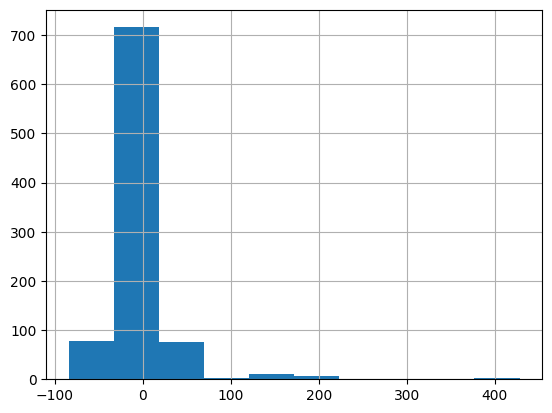

In [9]:
model.resid.hist(bins = 10);

In [8]:
#HOMOGENEITY OF VARIANCE
#H0: the variance of the quantitative variable is the same, for any group from the qualitative variable
#H1: At least one variance is different
stats.levene(df['Fare'][df['Pclass'] == 1],
             df['Fare'][df['Pclass'] == 2], 
             df['Fare'][df['Pclass'] == 3])

LeveneResult(statistic=118.57020037111805, pvalue=2.288618662046418e-46)

In [11]:
rp.summary_cont(df['Fare'].groupby(df['Pclass']))

,N,Mean,SD,SE,95% Conf.,Interval
Pclass,,,,,,
1,216,84.1547,78.3804,5.3331,73.6428,94.6666
2,184,20.6622,13.4174,0.9891,18.7106,22.6138
3,491,13.6756,11.7781,0.5315,12.6312,14.7199


In [9]:
#When the normality or homogeneity hypothesis is rejected, Kruskall-Wallis test must be used, instead of ANOVA.
#Kruskall-Wallis
#H0: the location of the quantitative variable is the same, for any group from the qualitative variable
#H1: At least one location is different
stats.kruskal(df['Fare'][df['Pclass'] == 1],
             df['Fare'][df['Pclass'] == 2], 
             df['Fare'][df['Pclass'] == 3])

KruskalResult(statistic=438.0437034212556, pvalue=7.586096900646798e-96)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2 -63.4925   0.0 -72.9165 -54.0685   True
     1      3 -70.4791   0.0 -78.1489 -62.8094   True
     2      3  -6.9866 0.108 -15.1064   1.1331  False
-----------------------------------------------------


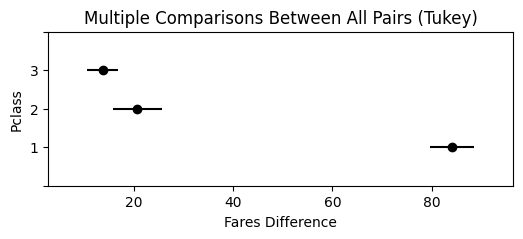

In [10]:
#TUKEY HONESTLY SIGNIFICANT DIFFERENCE (HSD)
#build confidence interval for every difference between groups means
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['Fare'], df['Pclass'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
post_hoc_res.plot_simultaneous(ylabel= "Pclass", xlabel= "Fares Difference", figsize=(6,2));